In [1]:
import numpy as np
import matplotlib.pyplot as plt

from utils.data_process import get_CIFAR10_data
from models.neural_net import NeuralNetwork
from kaggle_submission import output_submission_csv

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Loading CIFAR-10
Now that you have implemented a neural network that passes gradient checks and works on toy data, you will test your network on the CIFAR-10 dataset.

In [2]:
# You can change these numbers for experimentation
# For submission be sure they are set to the default values 
TRAIN_IMAGES = 49000
VAL_IMAGES = 1000
TEST_IMAGES = 5000

data = get_CIFAR10_data(TRAIN_IMAGES, VAL_IMAGES, TEST_IMAGES)
X_train, y_train = data['X_train'], data['y_train']
X_val, y_val = data['X_val'], data['y_val']
X_test, y_test = data['X_test'], data['y_test']

# Train a network
To train our network we will use SGD. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

You can try different numbers of layers and also the different activation functions that you implemented on the CIFAR-10 dataset below.

### You can see the hyperparameter tuning I performed for all possible networks...

In [3]:

#best_acc = 0
#for lay in [2,3]:
#    for func in ['relu','sigmoid']:
#        for reg_const in [0.00001,0.0001,0.001,0.01,0.1]:
#            for lr in [1e-1,5e-2,1e-2,5e-3,1e-3,5e-4,1e-4]:
#                for decay in [0.85,0.90,0.95,0.98,0.99]:
#
#                    input_size = 32 * 32 * 3
#                    num_layers = lay
#                    hidden_size = 120
#                    hidden_sizes = [hidden_size]*(num_layers-1)
#                    num_classes = 10
#                    net = NeuralNetwork(input_size, hidden_sizes, num_classes, num_layers, nonlinearity=func)
#
#                    # Train the network
#                    stats = net.train(X_train, y_train, X_val, y_val,
#                                num_iters=8000, batch_size=200,
#                                learning_rate=lr, learning_rate_decay=decay,
#                                reg=reg_const, verbose=True)
#
#
#                    # Predict on the validation set
#                    val_acc = (net.predict(X_val) == y_val).mean()
#                    print('Validation accuracy: ', val_acc)
#                    print('reg = ',reg_const)
#                    print('lr = ',lr)
#                    print('decay = ',decay)



In [4]:
# Train some random 2-layer RELU so that the next cells can execute
input_size = 32 * 32 * 3
num_layers = 2
hidden_size = 120
hidden_sizes = [hidden_size]*(num_layers-1)
num_classes = 10
net = NeuralNetwork(input_size, hidden_sizes, num_classes, num_layers, nonlinearity='relu')

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=0.1, learning_rate_decay=0.92,
            reg=1e-05, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()

init
init
iteration 0 / 1000: loss 2.430229
iteration 100 / 1000: loss 1.646622
iteration 200 / 1000: loss 1.448840
iteration 300 / 1000: loss 1.381484
iteration 400 / 1000: loss 1.578057
iteration 500 / 1000: loss 1.392193
iteration 600 / 1000: loss 1.298584
iteration 700 / 1000: loss 1.424386
iteration 800 / 1000: loss 1.296613
iteration 900 / 1000: loss 1.328818


# Graph loss and train/val accuracies

Examining the loss graph along with the train and val accuracy graphs should help you gain some intuition for the hyperparameters you should try in the hyperparameter tuning below. It should also help with debugging any issues you might have with your network.

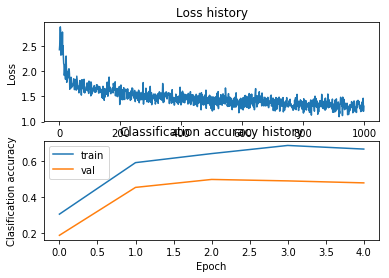

In [5]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()

##### Hyperparameter tuning

Once you have successfully trained a network you can tune your hyparameters to increase your accuracy.

Based on the graphs of the loss function above you should be able to develop some intuition about what hyperparameter adjustments may be necessary. A very noisy loss implies that the learning rate might be too high, while a linearly decreasing loss would suggest that the learning rate may be too low. A large gap between training and validation accuracy would suggest overfitting due to large model without much regularization. No gap between training and validation accuracy would indicate low model capacity. 


You will compare networks of two and three layers using the different activation functions you implemented. 

The different hyperparameters you can experiment with are:
- **Batch size**: We recommend you leave this at 200 initially which is the batch size we used. 
- **Number of iterations**: You can gain an intuition for how many iterations to run by checking when the validation accuracy plateaus in your train/val accuracy graph.
- **Initialization** Weight initialization is very important for neural networks. We used the initialization `W = np.random.randn(n) / sqrt(n)` where `n` is the input dimension for layer corresponding to `W`. We recommend you stick with the given initializations, but you may explore modifying these. Typical initialization practices: http://cs231n.github.io/neural-networks-2/#init
- **Learning rate**: Generally from around 1e-4 to 1e-1 is a good range to explore according to our implementation.
- **Learning rate decay**: We recommend a 0.95 decay to start.
- **Hidden layer size**: You should explore up to around 120 units per layer. For three-layer network, we fixed the two hidden layers to be the same size when obtaining the target numbers. However, you may experiment with having different size hidden layers.
- **Regularization coefficient**: We recommend trying values in the range 0 to 0.1. 



Hints:
- After getting a sense of the parameters by trying a few values yourself, you will likely want to write a few for loops to traverse over a set of hyperparameters.
- If you find that your train loss is decreasing, but your train and val accuracy start to decrease rather than increase, your model likely started minimizing the regularization term. To prevent this you will need to decrease the regularization coefficient. 


## Two-layer Relu Activation Network 

In [6]:
# Use the results from your hyperparameter tuning to get the best specific activation network


input_size = 32 * 32 * 3
num_layers = 2
hidden_size = 120
hidden_sizes = [hidden_size]*(num_layers-1)
num_classes = 10
net_2_relu = NeuralNetwork(input_size, hidden_sizes, num_classes, num_layers, nonlinearity='relu')

# The parameters below are the optimal hyperparameters
stats = net_2_relu.train(X_train, y_train, X_val, y_val,
            num_iters=8000, batch_size=200,
            learning_rate=0.1, learning_rate_decay=0.92,
            reg=1e-05, verbose=True)

# Predict on the validation set
val_acc = (net_2_relu.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)
best_2layer_relu = net_2_relu # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_2layer_relu.                                                    #
#################################################################################
## You can see the hyperparameter tuning in the above cells. 


init
init
iteration 0 / 8000: loss 2.530514
iteration 100 / 8000: loss 1.624295
iteration 200 / 8000: loss 1.618215
iteration 300 / 8000: loss 1.453273
iteration 400 / 8000: loss 1.499370
iteration 500 / 8000: loss 1.409842
iteration 600 / 8000: loss 1.421226
iteration 700 / 8000: loss 1.474478
iteration 800 / 8000: loss 1.371159
iteration 900 / 8000: loss 1.389621
iteration 1000 / 8000: loss 1.331153
iteration 1100 / 8000: loss 1.460440
iteration 1200 / 8000: loss 1.244751
iteration 1300 / 8000: loss 1.236718
iteration 1400 / 8000: loss 1.132541
iteration 1500 / 8000: loss 1.129094
iteration 1600 / 8000: loss 1.078871
iteration 1700 / 8000: loss 1.181176
iteration 1800 / 8000: loss 1.134875
iteration 1900 / 8000: loss 1.073893
iteration 2000 / 8000: loss 1.135234
iteration 2100 / 8000: loss 1.217103
iteration 2200 / 8000: loss 1.181441
iteration 2300 / 8000: loss 0.974404
iteration 2400 / 8000: loss 1.014096
iteration 2500 / 8000: loss 1.201125
iteration 2600 / 8000: loss 0.968564
ite

## Two-layer Sigmoid Activation Network 

In [7]:
# Use the results from your hyperparameter tuning to get the best specific activation network

input_size = 32 * 32 * 3
num_layers = 2
hidden_size = 120
hidden_sizes = [hidden_size]*(num_layers-1)
num_classes = 10
net_2_sigmoid = NeuralNetwork(input_size, hidden_sizes, num_classes, num_layers, nonlinearity='sigmoid')

# The parameters below are the optimal hyperparameters
stats = net_2_sigmoid.train(X_train, y_train, X_val, y_val,
            num_iters=8000, batch_size=200,
            learning_rate=0.1, learning_rate_decay=0.95,
            reg=0.001, verbose=True)

# Predict on the validation set
val_acc = (net_2_sigmoid.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)
best_2layer_sigmoid = net_2_sigmoid # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_2layer_sigmoid.                                                    #
#################################################################################
## You can see the hyperparameter tuning in the above cells. 



init
init
iteration 0 / 8000: loss 2.474039
iteration 100 / 8000: loss 1.836113
iteration 200 / 8000: loss 1.846784
iteration 300 / 8000: loss 1.811012
iteration 400 / 8000: loss 1.746536
iteration 500 / 8000: loss 1.767288
iteration 600 / 8000: loss 1.806564
iteration 700 / 8000: loss 1.771186
iteration 800 / 8000: loss 1.757628
iteration 900 / 8000: loss 1.744931
iteration 1000 / 8000: loss 1.790012
iteration 1100 / 8000: loss 1.642162
iteration 1200 / 8000: loss 1.670019
iteration 1300 / 8000: loss 1.617213
iteration 1400 / 8000: loss 1.625599
iteration 1500 / 8000: loss 1.614941
iteration 1600 / 8000: loss 1.593045
iteration 1700 / 8000: loss 1.676270
iteration 1800 / 8000: loss 1.615718
iteration 1900 / 8000: loss 1.591973
iteration 2000 / 8000: loss 1.558853
iteration 2100 / 8000: loss 1.543813
iteration 2200 / 8000: loss 1.681874
iteration 2300 / 8000: loss 1.528018
iteration 2400 / 8000: loss 1.482165
iteration 2500 / 8000: loss 1.589847
iteration 2600 / 8000: loss 1.454395
ite

## Three-layer Relu Activation Network 

In [8]:
# Use the results from your hyperparameter tuning to get the best specific activation network


input_size = 32 * 32 * 3
num_layers = 3
hidden_size = 120
hidden_sizes = [hidden_size]*(num_layers-1)
num_classes = 10
net_3_relu = NeuralNetwork(input_size, hidden_sizes, num_classes, num_layers, nonlinearity='relu')

# The parameters below are the optimal hyperparameters
stats = net_3_relu.train(X_train, y_train, X_val, y_val,
            num_iters=8000, batch_size=200,
            learning_rate=0.1, learning_rate_decay=0.9,
            reg=0.01, verbose=True)

# Predict on the validation set
val_acc = (net_3_relu.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)
best_3layer_relu = net_3_relu # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_3layer_relu.                                                    #
#################################################################################
## You can see the hyperparameter tuning in the above cells. 


init
init
init
iteration 0 / 8000: loss 3.721303
iteration 100 / 8000: loss 2.764893
iteration 200 / 8000: loss 2.440249
iteration 300 / 8000: loss 2.396039
iteration 400 / 8000: loss 2.150403
iteration 500 / 8000: loss 2.015707
iteration 600 / 8000: loss 1.872550
iteration 700 / 8000: loss 1.929660
iteration 800 / 8000: loss 1.802353
iteration 900 / 8000: loss 1.957919
iteration 1000 / 8000: loss 1.653666
iteration 1100 / 8000: loss 1.826837
iteration 1200 / 8000: loss 1.726445
iteration 1300 / 8000: loss 1.691375
iteration 1400 / 8000: loss 1.559223
iteration 1500 / 8000: loss 1.625019
iteration 1600 / 8000: loss 1.566112
iteration 1700 / 8000: loss 1.654174
iteration 1800 / 8000: loss 1.566431
iteration 1900 / 8000: loss 1.584496
iteration 2000 / 8000: loss 1.515077
iteration 2100 / 8000: loss 1.466819
iteration 2200 / 8000: loss 1.397290
iteration 2300 / 8000: loss 1.606468
iteration 2400 / 8000: loss 1.448917
iteration 2500 / 8000: loss 1.516058
iteration 2600 / 8000: loss 1.48967

## Three-layer Sigmoid Activation Network 

In [9]:
# Use the results from your hyperparameter tuning to get the best specific activation network


input_size = 32 * 32 * 3
num_layers = 3
hidden_size = 120
hidden_sizes = [hidden_size]*(num_layers-1)
num_classes = 10
net_3_sigmoid = NeuralNetwork(input_size, hidden_sizes, num_classes, num_layers, nonlinearity='sigmoid')

# The parameters below are the optimal hyperparameters
stats = net_3_sigmoid.train(X_train, y_train, X_val, y_val,
            num_iters=8000, batch_size=200,
            learning_rate=0.1, learning_rate_decay=0.99,
            reg=0.0001, verbose=True)

# Predict on the validation set
val_acc = (net_3_sigmoid.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)
best_3layer_sigmoid = net_3_sigmoid # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_3layer_sigmoid.                                                    #
#################################################################################
## You can see the hyperparameter tuning in the above cells. 


init
init
init
iteration 0 / 8000: loss 2.419514
iteration 100 / 8000: loss 2.099135
iteration 200 / 8000: loss 1.903671
iteration 300 / 8000: loss 1.973841
iteration 400 / 8000: loss 1.836663
iteration 500 / 8000: loss 1.803616
iteration 600 / 8000: loss 1.848982
iteration 700 / 8000: loss 1.726433
iteration 800 / 8000: loss 1.764920
iteration 900 / 8000: loss 1.695098
iteration 1000 / 8000: loss 1.812219
iteration 1100 / 8000: loss 1.833441
iteration 1200 / 8000: loss 1.674015
iteration 1300 / 8000: loss 1.774481
iteration 1400 / 8000: loss 1.596163
iteration 1500 / 8000: loss 1.746515
iteration 1600 / 8000: loss 1.621956
iteration 1700 / 8000: loss 1.646043
iteration 1800 / 8000: loss 1.616881
iteration 1900 / 8000: loss 1.745817
iteration 2000 / 8000: loss 1.679695
iteration 2100 / 8000: loss 1.664153
iteration 2200 / 8000: loss 1.564219
iteration 2300 / 8000: loss 1.640000
iteration 2400 / 8000: loss 1.617654
iteration 2500 / 8000: loss 1.647644
iteration 2600 / 8000: loss 1.60599

# Run on the test set
When you are done experimenting, you should evaluate your final trained networks on the test set.

In [10]:
print('Two-layer relu')
test_acc = (best_2layer_relu.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Two-layer relu
Test accuracy:  0.5288


In [11]:
print('Two-layer sigmoid')
test_acc = (best_2layer_sigmoid.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Two-layer sigmoid
Test accuracy:  0.483


In [12]:
print('Three-layer relu')
test_acc = (best_3layer_relu.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Three-layer relu
Test accuracy:  0.5506


In [13]:
print('Three-layer sigmoid')
test_acc = (best_3layer_sigmoid.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Three-layer sigmoid
Test accuracy:  0.4886


# Kaggle output

Once you are satisfied with your solution and test accuracy output a file to submit your test set predictions to the Kaggle for Assignment 2 Neural Network. Use the following code to do so:

In [14]:
output_submission_csv('nn_2layer_relu_submission.csv', best_2layer_relu.predict(X_test))

In [15]:
output_submission_csv('nn_2layer_sigmoid_submission.csv', best_2layer_sigmoid.predict(X_test))

In [16]:
output_submission_csv('nn_3layer_relu_submission.csv', best_3layer_relu.predict(X_test))

In [17]:
output_submission_csv('nn_3layer_sigmoid_submission.csv', best_3layer_sigmoid.predict(X_test))